In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df_industries = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx', index_col='Date')
df_market = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam–Market.xlsx', index_col='Date')
df = pd.merge(df_industries, df_market, left_index=True, right_index=True)
# df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Let the market return be the target return. Using monthly return deviations for the five industry portfolios:

Calculate and report the expected return deviation and the tracking error, for the five industry portfolios and the global minimum-tracking-error portfolio.




In [3]:
deviations = df_industries.values - df_market['Market'].values[:, np.newaxis]   # R_i - R_m, 
R = np.mean(deviations,   # and get mean deviation
            axis=0)
tracking_error = np.mean(deviations,   # and get mean deviation
            axis=0)

pd.DataFrame(
            {'Mean Monthly Deviation %': R,
             'tracking error': tracking_error},
            index=df_industries.columns    
            )

,Mean Monthly Deviation %,tracking error
Cnsmr,0.054028,0.054028
Manuf,-0.286250,-0.286250
HiTec,0.277222,0.277222
Hlth,0.056944,0.056944
Other,-0.028750,-0.028750


In [4]:
V = np.cov(deviations,rowvar=False)     # get cov matrix

pd.DataFrame(
            V,
            columns=df_industries.columns,    
            index=df_industries.columns    
            ).round(4)

,Cnsmr,Manuf,HiTec,Hlth,Other
Cnsmr,2.4750,-0.6669,-0.2908,0.7987,-1.2569
Manuf,-0.6669,2.5395,-0.9254,-1.3090,0.7702
HiTec,-0.2908,-0.9254,1.8830,-0.9201,-1.2729
Hlth,0.7987,-1.3090,-0.9201,6.6505,-1.4171
Other,-1.2569,0.7702,-1.2729,-1.4171,3.1909


In [5]:
e = np.ones(len(df_industries.columns)).T
alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta

Plot the minimum-tracking-error frontier generated by the five industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. This graph must cover the range from −0.06% to 0.1% per month, in increments of 0.005% (or less), on the vertical axis.

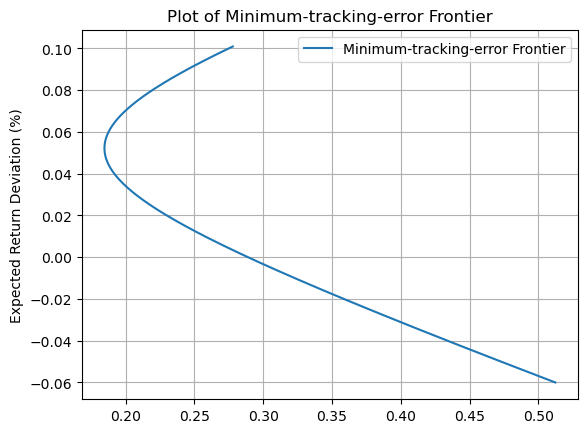

In [6]:
R_deviation = np.arange(-.06,.101,.0001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_deviation-R_mv)**2)**.5

R_f = 0
# sig_p_mvf = np.arange(0,.24,.001)
# R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_deviation, label="Minimum-tracking-error Frontier")
# plt.plot(sig_p_mvf, R_p_mvf, label="Tangency Line")
# plt.xlabel("Tracking Error (%)")  # X-axis label
plt.ylabel("Expected Return Deviation (%)")         # Y-axis label
plt.title("Plot of Minimum-tracking-error Frontier")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# minimum variance portfolio sigma and return
# left most portfolio

print(f"for global minimum-tracking-error portfolio.")
print(f"expected return deviation {np.min(sig_p):.5f} and the tracking error {R_mv:.5f}")


for global minimum-tracking-error portfolio.
expected return deviation 0.18469 and the tracking error 0.05215




Calculate and report the information ratio and portfolio weights for the "tangency" portfolio where the tangent line (from the origin) intersects with the frontier.

In [8]:
R_tg = (alpha*R_f-zeta)/(delta*R_f-alpha)
sig_tg = -(zeta-2*alpha*R_f+delta*R_f**2)**.5/(delta*(R_f-R_mv))
info_ratio = (R_tg-R_f)/sig_tg

print(f"Information Ratio:\t{info_ratio:.4f}")

Information Ratio:	0.3672


In [9]:
w_star = (delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.linalg.inv(V)@R \
         +(zeta-alpha*R_tg)/(zeta*delta-alpha**2)*np.linalg.inv(V)@e
print(f"tangency portfolio weights")
pd.DataFrame(w_star, df_industries.columns,columns=['Weights']).round(4)

tangency portfolio weights


,Weights
Cnsmr,0.1723
Manuf,0.0944
HiTec,0.3847
Hlth,0.1080
Other,0.2406


Briefly explain (in words) the economic significance of this "tangency" portfolio

---

Answer:

Tangency portfolio has the highest possible Sharpe ratio. Representing the highest return for risk portfolio